# Exercise: Create a Tech Gadget Customer Support Chatbot

Reflection: While this is a provided code sample it still lacks a lot of things. First its very simple so if I type "return" it wont recognize it as one of the options. I have to type out "return policy" to get the desired response. To improve it can contain more keyword response options. Also in the real world version it would require an actual inventory check to see if we have smartwatches otherwise it can be wrong. 

In [ ]:
# Simple Customer Support Chatbot

#list of keywords and responses. If the keyword(left) is found in the user input, the corresponding response(right) is returned.
responses = {
      "hi": "Hello! Welcome to TechGadget Support. How can I assist you today?",
      "do you have smartwatches": "Yes, we have a variety of smartwatches. You can check them out on our products page.",
      "shipping time": "Shipping usually takes 3-5 business days.",
      "shipping methods": "We offer standard, expedited, and overnight shipping.",
      "return policy": "You can return products within 30 days of receipt for a full refund.",
      "how to return": "To return a product, please visit our returns page for a step-by-step guide.",
      "won’t turn on": "Make sure your gadget is charged. If it still won’t turn on, you can visit our troubleshooting page.",
      "reset device": "To reset your device, hold down the power button for 10 seconds. If that doesn't work, please check the manual for a factory reset.",
      "bye": "Thank you for visiting TechGadget. If you have more questions, feel free to ask. Goodbye!"
}

#this takes in the user input as a parameter, turns it to lowercase, and then checks if the input contains any of the keywords in the responses. If it does itll return the response if not itll return the bottom response you see below.
def get_bot_response(user_input):
      user_input = user_input.lower()

      for keyword, response in responses.items():
          if keyword in user_input:
              return response

      return "I'm not sure how to respond to that. Can you try asking something else?"

# the main loop of the chatbot. It simply takes in user input and prints out the bot response until the user decides to quit.
while True:
      user_input = input("You: ")
      if user_input.lower() in ["quit", "exit", "bye"]:
          print("Bot: Goodbye! If you have any more questions, we're here to help.")
          break

      response = get_bot_response(user_input)
      print(f"Bot: {response}")

Bot: I'm not sure how to respond to that. Can you try asking something else?
Bot: You can return products within 30 days of receipt for a full refund.
Bot: Goodbye! If you have any more questions, we're here to help.


# Part 1: Predicting Building Energy Efficiency (Supervised Learning)

Supervised learning is basically what the name is. Supervised learning means that I or anyone who controls the model, gave the model a set of data that I predefined. For example, I can give it picture of cats and dogs and I labeled them all. Now the model is trained in those topics and can work with similar images.

In [ ]:
#comments came with the code so no need for me to add any
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

# Generate synthetic dataset for building features and energy efficiency ratings
np.random.seed(0)
data_size = 500
data = {
    'WallArea': np.random.randint(200, 400, data_size),
    'RoofArea': np.random.randint(100, 200, data_size),
    'OverallHeight': np.random.uniform(3, 10, data_size),
    'GlazingArea': np.random.uniform(0, 1, data_size),
    'EnergyEfficiency': np.random.uniform(10, 50, data_size)  # Energy efficiency rating
}
df = pd.DataFrame(data)

# Data preprocessing
X = df.drop('EnergyEfficiency', axis=1)
y = df['EnergyEfficiency']

# Visualize the relationships between features and the target variable (Energy Efficiency)
sns.pairplot(df, x_vars=['WallArea', 'RoofArea', 'OverallHeight', 'GlazingArea'], y_vars='EnergyEfficiency', height=4, aspect=1, kind='scatter')
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Plot the True values vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()

# Part 2: Vehicle Clustering (Unsupervised Learning)

Unsupervised learning is the opposite. I gave the model the data but I did not tell it any pattern or category to describe the data. The model will then create its own pattern for that data. For instance, I can give it a picture of a dog, flower, chicken, cactus, and donkey. While they are not the same animal the model might look at their features and decide to categorize them as animals vs plants.

Reinforcement learning is the repeated process of guiding the model to improve through rewards and penalties. For instance, a game AI character will use reinforcement learning. As it makes its way through a level it will "die" by making the wrong step/input but survive if it makes the right one. Every death the model learns from its mistake.

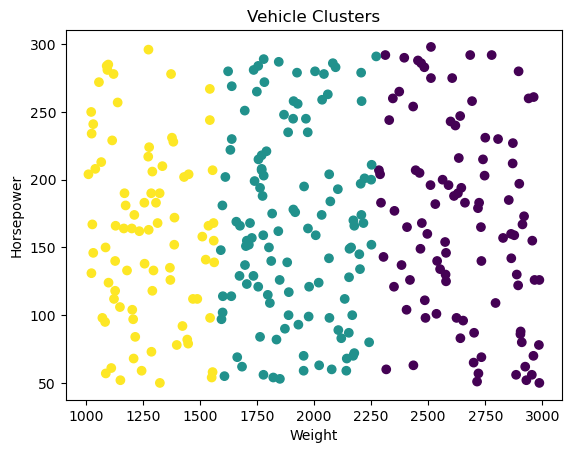

In [2]:
#no need for my comments here again
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

# Generate synthetic dataset for vehicles
np.random.seed(0)
data_size = 300
data = {
    'Weight': np.random.randint(1000, 3000, data_size),
    'EngineSize': np.random.uniform(1.0, 4.0, data_size),
    'Horsepower': np.random.randint(50, 300, data_size)
}
df = pd.DataFrame(data)

# No labels are needed for unsupervised learning
X = df

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Plotting the clusters
plt.scatter(df['Weight'], df['Horsepower'], c=kmeans.labels_)
plt.xlabel('Weight')
plt.ylabel('Horsepower')
plt.title('Vehicle Clusters')
plt.show()

# Building a Decision Tree to Predict Customer Churn

- A Decision Tree is similar to a flowchart used in machine learning to make predictions/decisions. It splits data based on features to make predictions. The root node contains the first point of data that could be considered critical and then it branches off into yes or no nodes. Depending on the input data the "NO" can be the end or they can branch off into further questions of data with their own child nodes.
- For the decision tree below we want to predict if a customer with churn/leave based on the simulated data we have. The root node compares the data concerning customer service calls. The first decision was "did customers make 3.5 or fewer service calls?". With a sample of 70, 33 no churn and 37 churn. The right child then represents calls > 3.5 with 14 no churns while the left represents calls <= 3.5 and now includes the question about age.

Model Accuracy: 1.0


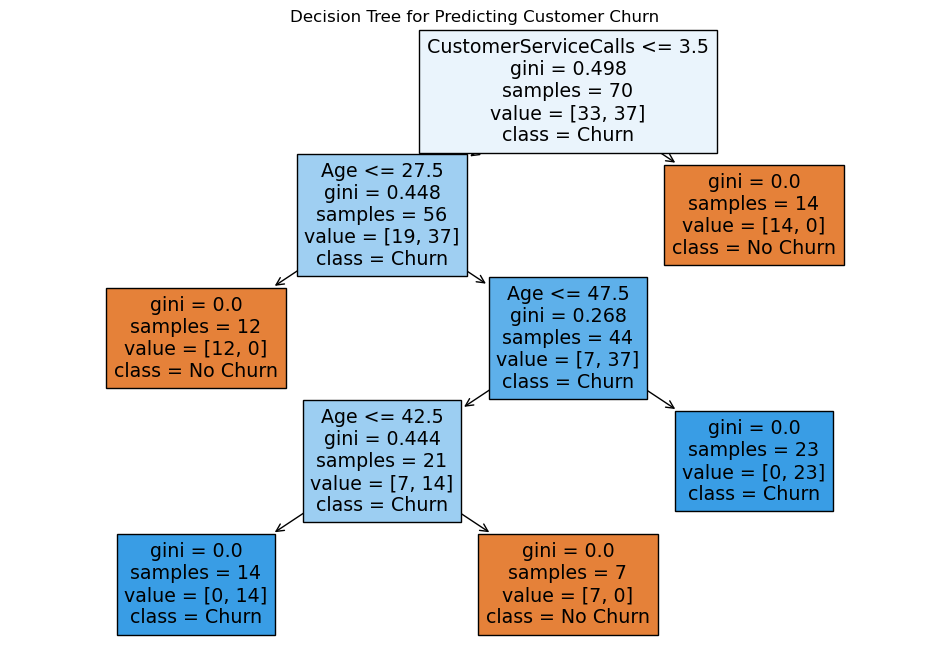

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

warnings.filterwarnings('ignore')

# Creating a synthetic dataset
# This dataset simulates customer data for a telecom company
data = {
      'CustomerID': range(1, 101),  # Unique ID for each customer
      'Age': [20, 25, 30, 35, 40, 45, 50, 55, 60, 65]*10,  # Age of customers
      'MonthlyCharge': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]*10,  # Monthly bill amount
      'CustomerServiceCalls': [1, 2, 3, 4, 0, 1, 2, 3, 4, 0]*10,  # Number of customer service calls
      'Churn': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes']*10  # Churn status
}
df = pd.DataFrame(data)

# Splitting the dataset into features and target variable
# Features include age, monthly charge, and customer service calls
# The target variable is churn (Yes or No)
X = df[['Age', 'MonthlyCharge', 'CustomerServiceCalls']]
y = df['Churn']

# Splitting the dataset into training and testing sets
# 70% of the data is used for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Decision Tree model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluating the model using accuracy
# Accuracy is the proportion of correct predictions among the total number of cases processed
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy}')

# Visualizing the decision tree
# This visualization helps in understanding how the model makes decisions
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=['Age', 'MonthlyCharge', 'CustomerServiceCalls'], class_names=['No Churn', 'Churn'])
plt.title('Decision Tree for Predicting Customer Churn')
plt.show()

# Exercise: Neural Networks

Neural Networks in machine learning models is inspired by the human neural network. It is used for things like pattern recognition in data. It consists of layers of interconnected neurons (nodes), where each neuron processes inputs, applies weights and biases, and passes the result through an activation function to produce an output. The network typically includes an input layer (for raw data), one or more hidden layers (for intermediate processing), and an output layer (for predictions). Neural networks excel at solving complex tasks, such as image recognition, natural language processing, and predictive modeling, by learning patterns from large datasets. Training involves adjusting weights and biases using techniques like backpropagation and gradient descent to minimize prediction errors. Despite their power, neural networks require large amounts of data and computational resources, and they can be difficult to interpret.

### Step 1: Generate Synthetic Data
In this step we generate fake data that we will be using for our neural network. We want to know if a customer will make a purchase based on their website visit duration and number of pages visited.

In [6]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels

### Step 2: Preprocess the Data
Similar to the last exercise in which we gave it a portion as training data and the remaining as test data to check for accuracy. If we gave it all as training data then we would not know if it will make correct decisions on new data since its like giving a test on questions from the review sheet.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

### Step 3: Build and Train the Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

### Step 4: Evaluate the Model

In [9]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

NameError: name 'model' is not defined

### Step 5: Visualizing Training Process

In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Step 6: Creating the Visual (Decision Boundary)

In [ ]:
# Generate a grid over the feature space
x_min, x_max = df['VisitDuration'].min() - 0.1, df['VisitDuration'].max() + 0.1
y_min, y_max = df['PagesVisited'].min() - 0.1, df['PagesVisited'].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Predict over the grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(df['VisitDuration'], df['PagesVisited'], c=df['Purchase'], edgecolor='k')
plt.xlabel('Visit Duration')
plt.ylabel('Pages Visited')
plt.title('Decision Boundary of Neural Network')
plt.show()